In [21]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision

In [22]:
model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)
model.eval();

/home/dai/anaconda3/envs/dnn/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/dai/anaconda3/envs/dnn/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [42]:
img = plt.imread('../images/jungle.jpg')
print(img.shape)
img_tensor = torchvision.transforms.functional.to_tensor(img)
img_tensor.shape

(476, 640, 3)


torch.Size([3, 476, 640])

In [24]:
outputs = model([img_tensor])
outputs

[{'boxes': tensor([[416.1659, 213.5272, 618.6298, 294.9222],
          [ 47.0028, 234.2588, 162.7326, 395.3300],
          [ 89.9395, 231.5175, 211.4969, 347.4781],
          [254.5588, 236.8033, 341.3957, 270.9430]], grad_fn=<StackBackward0>),
  'labels': tensor([25, 24, 24, 24]),
  'scores': tensor([0.9989, 0.9989, 0.9979, 0.9962], grad_fn=<IndexBackward0>),
  'masks': tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            ...,
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.]]],
  
  
          [[[0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            ...,
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.]]],
  
  
          [[[0., 0., 0.,  ..., 0., 0., 0.],
      

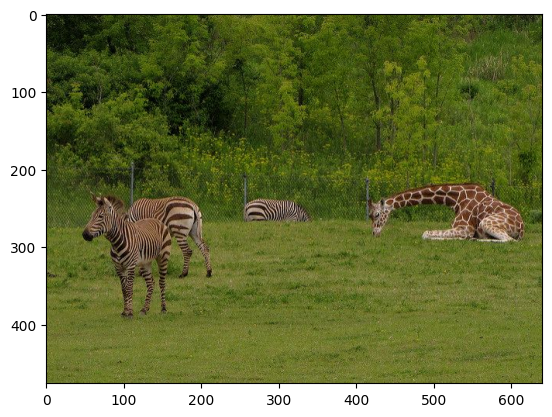

In [25]:
plt.imshow(img)

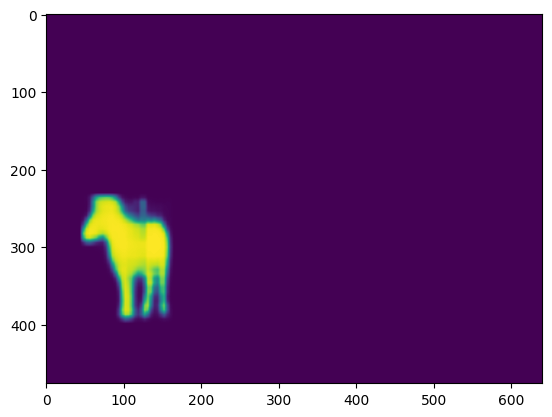

In [28]:
a  = outputs[0]['masks'][1]
a = torch.permute(a, (1,2,0))
plt.imshow(a.detach().numpy())

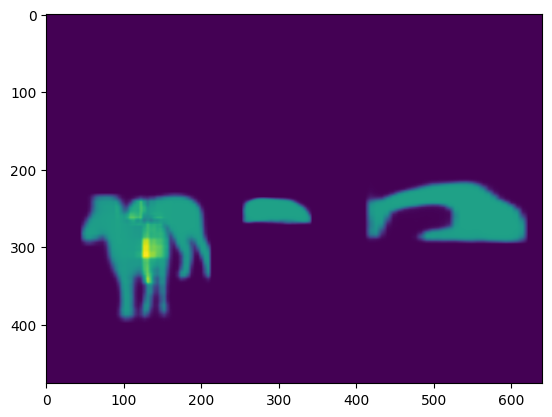

In [31]:
b = outputs[0]['masks'].sum(axis=0)
b = torch.permute(b, (1,2,0))
plt.imshow(b.detach().numpy())

In [49]:
b_arr = b.detach().numpy()*50

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(476, 640, 3)


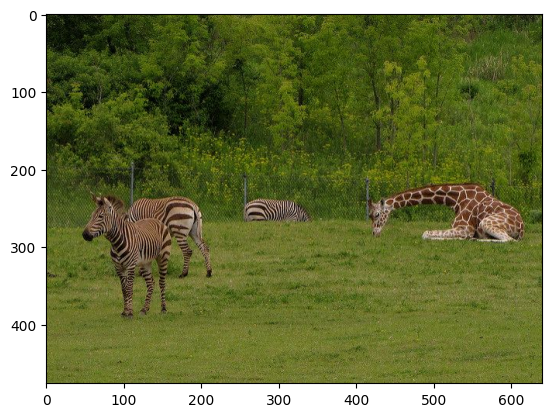

In [50]:
c  = img - b.detach().numpy()
print(c.shape)
plt.imshow(c/255)